# Model 2: Predicting SAT Score

## Dataset: Average SAT Scores of Schools in NYC

The dataset used for this model consisted of information for every accredited high school in New York City (school name, borough, building code, street address, latitude/longitude coordinates, phone number, start and end times, student enrollment with race breakdown) as well as each schools’ average scores on each SAT test section for the 2014-2015 school year. 

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("datasets/sat-scores.csv")

In [345]:
df['enrollment'] = df['Student Enrollment']

In [291]:
# dataset info and what we are predicting

## Part 1: Exploratory Data Analysis

In [323]:
for row in df:
  print(f"Feature Name: {row} | Feature Type: {df[row].dtype}")

Feature Name: School ID | Feature Type: object
Feature Name: School Name | Feature Type: object
Feature Name: Borough | Feature Type: object
Feature Name: Building Code | Feature Type: object
Feature Name: Street Address | Feature Type: object
Feature Name: City | Feature Type: object
Feature Name: State | Feature Type: object
Feature Name: Zip Code | Feature Type: int64
Feature Name: Latitude | Feature Type: float64
Feature Name: Longitude | Feature Type: float64
Feature Name: Phone Number | Feature Type: object
Feature Name: Start Time | Feature Type: object
Feature Name: End Time | Feature Type: object
Feature Name: Student Enrollment | Feature Type: float64
Feature Name: Percent White | Feature Type: object
Feature Name: Percent Black | Feature Type: object
Feature Name: Percent Hispanic | Feature Type: object
Feature Name: Percent Asian | Feature Type: object
Feature Name: Average Score (SAT Math) | Feature Type: float64
Feature Name: Average Score (SAT Reading) | Feature Type: fl

In [293]:
print(df.shape)

(435, 24)


In [294]:
print(df.isnull().sum())

School ID                       0
School Name                     0
Borough                         0
Building Code                   0
Street Address                  0
City                            0
State                           0
Zip Code                        0
Latitude                        0
Longitude                       0
Phone Number                    0
Start Time                      4
End Time                        4
Student Enrollment              7
Percent White                   7
Percent Black                   7
Percent Hispanic                7
Percent Asian                   7
Average Score (SAT Math)       60
Average Score (SAT Reading)    60
Average Score (SAT Writing)    60
Percent Tested                 49
enrollment                      7
p_tested                       49
dtype: int64


We can see that the null values seem to be spread over a wide range of features, most of which are numerical. This combined with the fact that our dataset is pretty small (only 435 rows) suggests that trying to fill in null values using median or mean could easily produce large skews in the data. Therefore, our data preprocessing will include removing the null values from the dataset.

In [346]:
# reloading the data ith 
df = df.replace('nan', None)

df = df.dropna()

df = df.reset_index()

### Investigating the relationship between Ethnicity and SAT Score

The dataset includes the percentage of students's race (white, black, hispanic, and asian). Since there are 4 ethnicity groups we expect an equally distributed student population to have roughly 25% of each race. Therefore, we can look at the actual distribution to determine the variance from this baseline distribution in order to compute a diversity index.

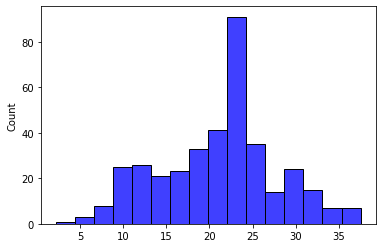

In [347]:
import statistics

def vary(df):

    variance = []

    for x in range(len(df["Percent White"])):
        cols = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]
        l = []
        for y in cols:
            l.append(float(str(df.at[x, y]).replace("%", "")))
    
        norm = 100/len(l)
        newl = []
        for z in l:
            newl.append(abs(norm-z))
    
        variance.append(statistics.mean(newl))
        
    return variance

sns.histplot(x=vary(df))
plt.show()
    
df["diversityIndex"] = vary(df)

After computing the diversity index, we are able to plot it against the different boroughs to investigate the diversity in each area.

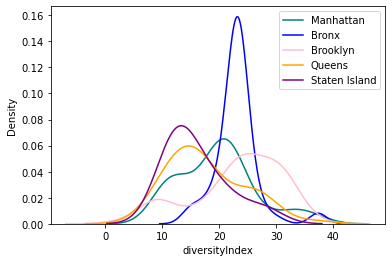

In [348]:
sns.kdeplot(df[df['Borough']=="Manhattan"]['diversityIndex'], color="teal", label="Manhattan",)
sns.kdeplot(df[df['Borough']=="Bronx"]['diversityIndex'], color="blue", label="Bronx",)
sns.kdeplot(df[df['Borough']=="Brooklyn"]['diversityIndex'], color="pink", label="Brooklyn",)
sns.kdeplot(df[df['Borough']=="Queens"]['diversityIndex'], color="orange", label="Queens",)
sns.kdeplot(df[df['Borough']=="Staten Island"]['diversityIndex'], color="purple", label="Staten Island",)
plt.legend()
plt.show()

More importantly, we want to determine whether there is a significant correlation between the diversity of a student population at their SAT scores.

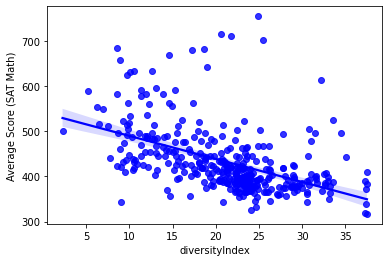

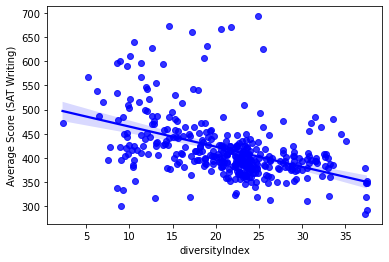

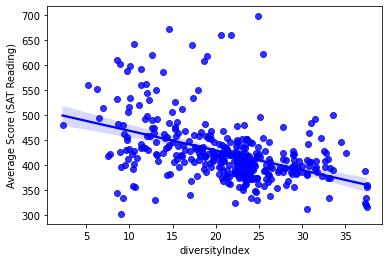

In [327]:
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Math)"])
plt.show()
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Writing)"])
plt.show()
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Reading)"])
plt.show()

### Investigating the relationship between the name of schools and the SAT scores of students

We tokenized the name of each school indo individual words and filtered out the stopwords to see what vocabulary is associated with the highest SAT scores.

In [328]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import nltk
nltk.download('stopwords')
# Data is downloaded to /root/nltk_data/corpora/stopwords.zip

# from zipfile import ZipFile
# file_loc = '/root/nltk_data/corpora/stopwords.zip'
# with ZipFile(file_loc, 'r') as z:
#   z.extractall('/root/nltk_data/stopwords/')

# data = nltk.corpus.comtrans.aligned_sents('alignment-en-fr.txt')
# print(data[0]) # <AlignedSent: 'Resumption of the se...' -> 'Reprise de la sessio...'>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fionachiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [329]:
def vocabGen(df):

    vocab = {}

    for i in range(df.shape[0]):
    
        tokenizer = RegexpTokenizer(r'\w+')
    
        text_tokens = tokenizer.tokenize(df["School Name"][i])

        tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

        for j in tokens_without_sw:
            if j not in list(vocab.keys()):
                vocab[j] = 0


    for i in list(vocab.keys()):
        count = 0
        for j in range(df.shape[0]):
            if i in df["School Name"][j]:
                vocab[i] += df["Average Score (SAT Math)"][j] + df["Average Score (SAT Reading)"][j] + df["Average Score (SAT Writing)"][j]
                count+=1
        vocab[i] = vocab[i]/count
        
    return vocab
    
    
vocab1 = sorted((value,key) for (key,value) in vocabGen(df).items())

vocab = vocabGen(df)

In [301]:
vocab

{'New': 1310.3,
 'Explorations': 1486.5,
 'Science': 1423.851851851852,
 'Technology': 1264.4166666666667,
 'Math': 1420.8,
 'High': 1293.8341463414633,
 'School': 1287.1122807017543,
 'Essex': 1193.0,
 'Street': 1195.0,
 'Academy': 1216.3647058823528,
 'Lower': 1261.0,
 'Manhattan': 1311.25,
 'Arts': 1246.9714285714285,
 'Dual': 1529.0,
 'Language': 1178.6,
 'Asian': 1529.0,
 'Studies': 1358.2941176470588,
 'Henry': 1197.0,
 'International': 1130.3684210526317,
 'Bard': 1876.5,
 'Early': 1514.7142857142858,
 'College': 1394.9,
 'Urban': 1211.6842105263158,
 'Assembly': 1223.6875,
 'Government': 1196.0,
 'Law': 1213.7272727272727,
 'Marta': 1245.0,
 'Valle': 1245.0,
 'University': 1217.0,
 'Neighborhood': 1144.0,
 'Design': 1222.8,
 'Pace': 1292.0,
 'Health': 1236.7,
 'Professions': 1238.0,
 'Human': 1243.3333333333333,
 'Services': 1327.0,
 'Diplomacy': 1290.0,
 'Union': 1049.0,
 'Square': 1049.0,
 'Institute': 1357.0,
 'Collaborative': 1383.2,
 'Education': 1329.0,
 'Gramercy': 1360.

From this dictionary of vocab words mapped to average SAT scores, we are able to get plots of the SAT scores of the highest, mean, and lowest 10 associated words.

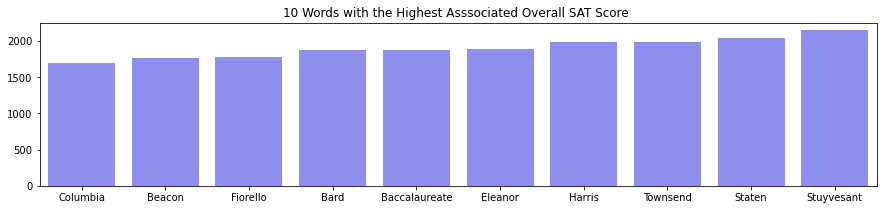

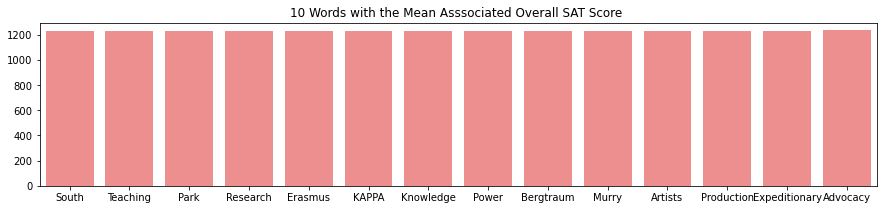

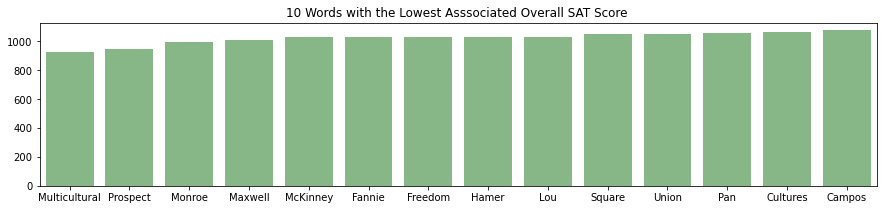

In [349]:
arrs = np.array(vocab1)[434:444,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="blue", alpha=0.5)
plt.title("10 Words with the Highest Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[200:214,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="red", alpha=0.5)
plt.title("10 Words with the Mean Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[0:14,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="green", alpha=0.5)
plt.title("10 Words with the Lowest Asssociated Overall SAT Score ")
plt.show()

## Part 2: Dataset Preparation

To construct a feature from the school name that could be used as a predictor for average SAT score, we decided to find the quartiles of total SAT score and assign the tokenized words to a quartile based on their average SAT score. This allowed us to create one hot vectors for model training [q0, q1, q2, q3]. Each token is belongs exclusively to one of the quartiles and each school is given a value of 1 or 0 for each of the quartiles represented in the vector if its name contains a word in one of the quartiles.

[1157.0, 1226.0, 1327.0]


/Users/fionachiu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


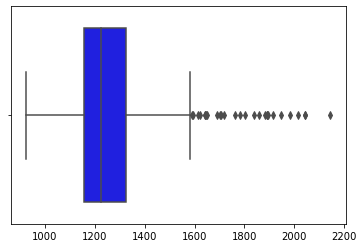

In [303]:
# first find the quartile thresholds

sns.boxplot(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])

a = np.array(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])
p = [np.percentile(a, 25), np.percentile(a, 50), np.percentile(a, 75)] 
print(p)

In [304]:
def quartileBin(vocab):

    qWords = {0:[], 1:[], 2:[], 3:[]}

    for i in vocab.keys():
        if float(vocab[i]) < 1157:
            qWords[0].append(i)
        elif float(vocab[i]) >= 1157 and float(vocab[i]) < 1226:
            qWords[1].append(i)
        elif float(vocab[i]) >= 1226 and float(vocab[i]) < 1327:
            qWords[2].append(i)
        elif float(vocab[i]) >= 1327:
            qWords[3].append(i)
            
    return qWords

In [305]:
def oneHotVectors(qWords):

    q0 = []
    q1 = []
    q2 = []
    q3 = []

    for i in range(df.shape[0]):
        if any(item in qWords[0] for item in df["School Name"][i].split(" ")):
            q0.append(1)
        else:
            q0.append(0)
        if any(item in qWords[1] for item in df["School Name"][i].split(" ")):
            q1.append(1)
        else:
            q1.append(0)
        if any(item in qWords[2] for item in df["School Name"][i].split(" ")):
            q2.append(1)
        else:
            q2.append(0)
        if any(item in qWords[3] for item in df["School Name"][i].split(" ")):
            q3.append(1)
        else:
            q3.append(0)
            
    return q0, q1, q2, q3

In [350]:
q0, q1, q2, q3 = oneHotVectors(quartileBin(vocab))

df["q0"] = q0
df["q1"] = q1
df["q2"] = q2
df["q3"] = q3

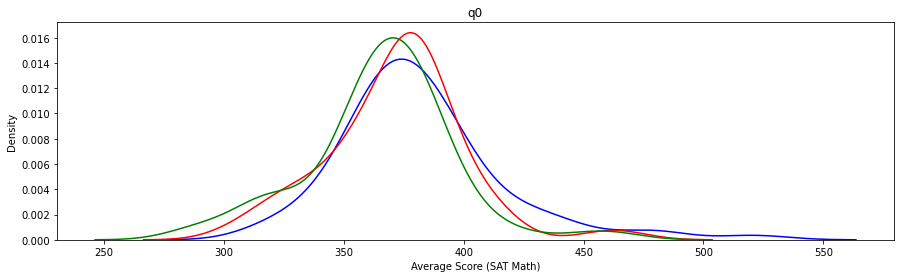

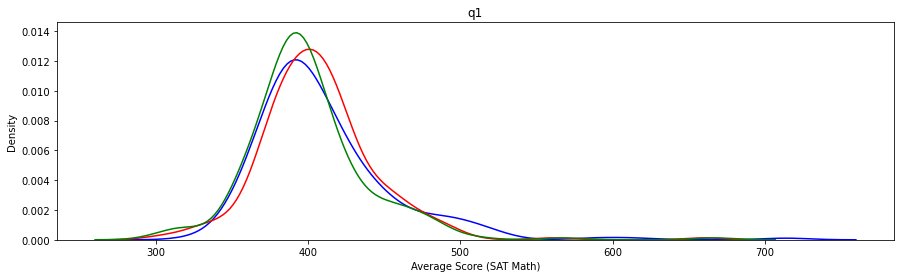

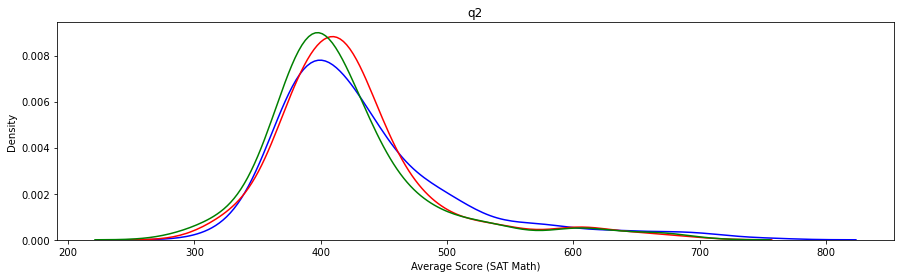

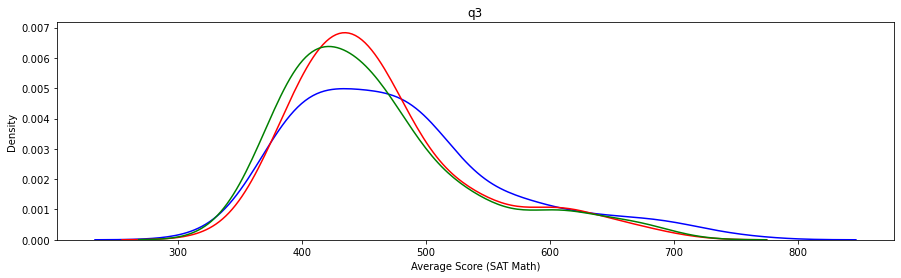

In [351]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['q0']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['q0']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['q0']==1]['Average Score (SAT Writing)'], color="green")
plt.title("q0")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['q1']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['q1']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['q1']==1]['Average Score (SAT Writing)'], color="green")
plt.title("q1")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['q2']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['q2']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['q2']==1]['Average Score (SAT Writing)'], color="green")
plt.title("q2")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['q3']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['q3']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['q3']==1]['Average Score (SAT Writing)'], color="green")
plt.title("q3")
plt.show()
    

In [352]:
def sumSAT(df):

    totalScore = df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"]
    
    return totalScore

df["totalScore"] = sumSAT(df)

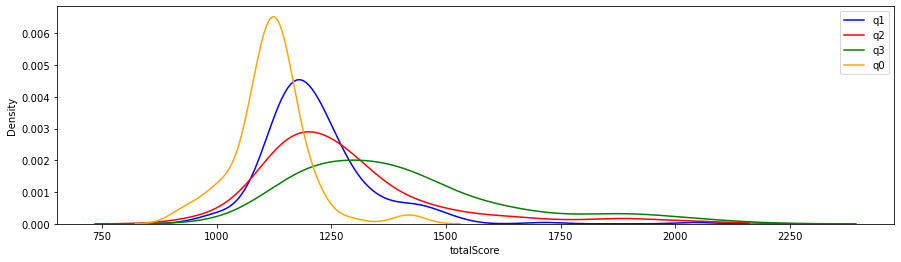

In [334]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['q1']==1]['totalScore'], color = "blue", label="q1")
sns.kdeplot(df[df['q2']==1]['totalScore'], color="red", label="q2")
sns.kdeplot(df[df['q3']==1]['totalScore'], color="green", label="q3")
sns.kdeplot(df[df['q0']==1]['totalScore'], color="orange", label="q0")
plt.legend()
plt.show()

### Data Cleaning

In [356]:
#Formatting percentage

def removePercentage(df):
    newdf = [] 
    for i in df:
        newdf.append(float(i.split("%")[0]))
        
    return newdf

df["Percent Tested"] = removePercentage(df["Percent Tested"])
df['p_tested'] = df['Percent Tested']

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diversityIndex', ylabel='Percent Tested'>

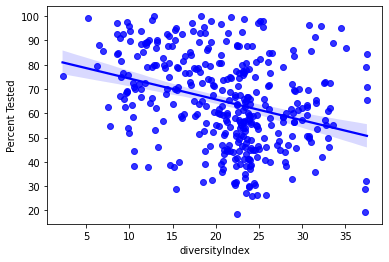

In [312]:
df["diversityIndex"] = vary(df)

sns.regplot(df["diversityIndex"], df["Percent Tested"])

To construct a feature from the "Start Time" and "End Time" of a given school, we use the following function to get the duration of time spent in school by the students.

In [337]:
def time(df):
    slist = [] 
    elist = []
    for i in range(len(df["Start Time"])):
        i = df["Start Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1])+1200)
    for i in range(len(df["End Time"])):
        i = df["End Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1])+1200)
    slist = np.array(slist)
    elist = np.array(elist)
    difflist = elist-slist
                         
    return difflist

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/fionachiu/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


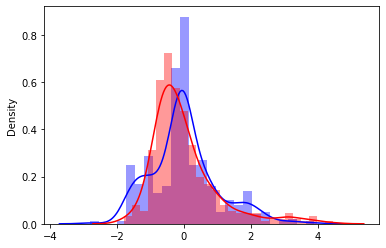

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sns.distplot(scaler.fit_transform(time(df).reshape(-1,1)), color="blue")
sns.distplot(scaler.fit_transform(np.array(df["totalScore"]).reshape(-1,1)), color="red")
plt.show()

In [358]:
df["time"] = time(df)

In [316]:
from sklearn import preprocessing

In [359]:
feature_df = df

# deleting features we don't need
del feature_df["School ID"]
del feature_df["School Name"]
del feature_df["Building Code"]
del feature_df["Street Address"]
del feature_df["City"]
del feature_df["State"]
del feature_df["Zip Code"]
del feature_df["Phone Number"]
del feature_df["Start Time"]
del feature_df["End Time"]
del feature_df["Percent White"]
del feature_df["Percent Black"]
del feature_df["Percent Hispanic"]
del feature_df["Percent Asian"]

# repeated feature
del feature_df["Student Enrollment"]
del feature_df["Percent Tested"]

# we also want to delete the constituent SAT scores as they are too highly correlated
# with the target (Total SAT Score) and inhibit the exploration of the effects of other features
del feature_df["Average Score (SAT Math)"]
del feature_df["Average Score (SAT Reading)"]
del feature_df["Average Score (SAT Writing)"]
del feature_df["index"]

In [360]:
feature_df

Borough  Latitude  Longitude  enrollment  p_tested  diversityIndex  q0  \
0    Manhattan  40.71873  -73.97943      1735.0      91.0           8.950   0   
1    Manhattan  40.71687  -73.98953       358.0      78.9          15.550   0   
2    Manhattan  40.71687  -73.98953       383.0      65.1          18.350   0   
3    Manhattan  40.71687  -73.98953       416.0      95.9          32.150   0   
4    Manhattan  40.71376  -73.98526       255.0      59.7          16.275   1   
..         ...       ...        ...         ...       ...             ...  ..   
369     Queens  40.60199  -73.76283       381.0      44.6          21.600   0   
370     Queens  40.58601  -73.82309       368.0      38.5          14.675   1   
371     Queens  40.58601  -73.82309       683.0      76.6          16.400   0   
372     Queens  40.58601  -73.82309       397.0      46.5          19.325   0   
373     Queens  40.58413  -73.82568      1302.0      99.2           5.250   0   

     q1  q2  q3  totalScore  time  
0     0   1   1      1859.0   785  
1     1   0   0      1193.0   645  
2     1   1   0      1261.0   670  
3     1   1   1      1529.0   735  
4     1   1   1      1197.0   700  
..   ..  ..  ..         ...   ...  
369   0   1   1      1086.0   865  
370   1   1   0      1114.0   685  
371   0   1   0      1280.0   689  
372   1   1   0      1207.0   790  
373   1   0   0      1716.0   655  

[374 rows x 12 columns]

In [361]:
# encoding categorical data (Borough)

le = preprocessing.LabelEncoder()
le.fit(["Manhattan", "Bronx", "Queens", "Brooklyn", "Staten Island"])
feature_df["Borough"] = le.transform(feature_df["Borough"])
feature_df["Borough"]

0      2
1      2
2      2
3      2
4      2
      ..
369    3
370    3
371    3
372    3
373    3
Name: Borough, Length: 374, dtype: int64

In [362]:
# normalizing the data

from sklearn.preprocessing import MinMaxScaler

def normalize(data):
    scaler = MinMaxScaler()
    
    for i in list(data.columns):
        data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))
    
    
    return data

feature_df = normalize(feature_df)

feature_df.head(5)

Borough  Latitude  Longitude  enrollment  p_tested  diversityIndex   q0  \
0      0.5  0.528961   0.457226    0.300283  0.889571        0.190071  0.0   
1      0.5  0.523796   0.435517    0.040716  0.741104        0.377305  0.0   
2      0.5  0.523796   0.435517    0.045429  0.571779        0.456738  0.0   
3      0.5  0.523796   0.435517    0.051649  0.949693        0.848227  0.0   
4      0.5  0.515161   0.444695    0.021301  0.505521        0.397872  1.0   

    q1   q2   q3  totalScore      time  
0  0.0  1.0  1.0    0.766393  0.666667  
1  1.0  0.0  0.0    0.220492  0.260870  
2  1.0  1.0  0.0    0.276230  0.333333  
3  1.0  1.0  1.0    0.495902  0.521739  
4  1.0  1.0  1.0    0.223770  0.420290

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(feature_df.corr(), annot=True)

## Part 3: Model Training & Evaluation

In [363]:
import sklearn.model_selection as sk 

targets = feature_df["totalScore"]

feature_df.drop('totalScore', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = sk.train_test_split(df,targets,test_size = 0.1,random_state = 42, shuffle=True)

print(X_train.shape)

(336, 11)


In [364]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor


#Linear Support Vector Machine
model1 = sklearn.svm.SVR(kernel='linear', degree=2)
model1.fit(X_train, Y_train)
preds1 = model1.predict(X_val)


#Gaussian Support Vector Machine
model2 = sklearn.svm.SVR(kernel='rbf', degree=2)
model2.fit(X_train, Y_train)
preds2 = model2.predict(X_val)

#Ridge Regression
model3 = sklearn.linear_model.Ridge(alpha=1.0)
model3.fit(X_train, Y_train)
preds3 = model3.predict(X_val)

#Linear Regression
model4 = sklearn.linear_model.LinearRegression()
model4.fit(X_train, Y_train)
preds4 = model4.predict(X_val)

#Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=15, random_state=1)
model5.fit(X_train, Y_train)
preds5 = model5.predict(X_val)

#K Neighbour Regressor
model6 = KNeighborsRegressor()
model6.fit(X_train, Y_train)
preds6 = model6.predict(X_val)

#Ensemble Regressor:
er = VotingRegressor([('RDG', model3), ('LR', model4), ("RFR", model5)])
predsER = er.fit(X_train, Y_train).predict(X_val)



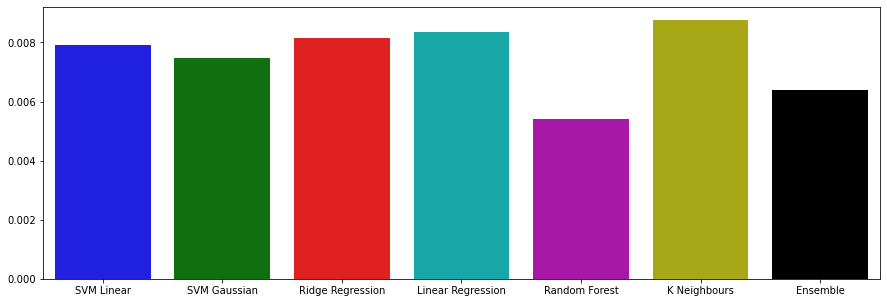

In [365]:
a = [np.sum(np.power((np.array(preds1)-np.array(Y_val)),2))/len(preds1),
     np.sum(np.power((np.array(preds2)-np.array(Y_val)),2))/len(preds2),
     np.sum(np.power((np.array(preds3)-np.array(Y_val)),2))/len(preds3),
     np.sum(np.power((np.array(preds4)-np.array(Y_val)),2))/len(preds4),
     np.sum(np.power((np.array(preds5)-np.array(Y_val)),2))/len(preds5),
     np.sum(np.power((np.array(preds6)-np.array(Y_val)),2))/len(preds6),
     np.sum(np.power((np.array(predsER)-np.array(Y_val)),2))/len(predsER)]

l = ["SVM Linear", "SVM Gaussian", "Ridge Regression", "Linear Regression", "Random Forest", "K Neighbours", "Ensemble"]

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=l, y=a)
plt.show()

In [ ]:
# evaluating the performance of trained models

In [366]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score
# Calculate the performance of this model
# score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
# print(score)

In [367]:
score = performance_metric(Y_val, preds1)
print("Linear Support Vector Machine: ", score)

score = performance_metric(Y_val, preds2)
print("Gaussian Support Vector Machine: ", score)

score = performance_metric(Y_val, preds3)
print("Ridge Regression: ", score)

score = performance_metric(Y_val, preds4)
print("Linear Regression: ", score)

score = performance_metric(Y_val, preds5)
print("Random Forest Regressor: ", score)

score = performance_metric(Y_val, preds6)
print("K Neighbour Regressor: ", score)

score = performance_metric(Y_val, predsER)
print("Ensemble Regressor: ", score)

Linear Support Vector Machine:  0.6411111484876464
Gaussian Support Vector Machine:  0.6605172738557479
Ridge Regression:  0.6298401157055767
Linear Regression:  0.620893603782648
Random Forest Regressor:  0.7549243760066604
K Neighbour Regressor:  0.6026866926698808
Ensemble Regressor:  0.7099977310403381


We can see that out of all the models, Random Forest had the lowest mean-squared error and the highest r-squared value, so this is what we decided to proceed with in our investigation

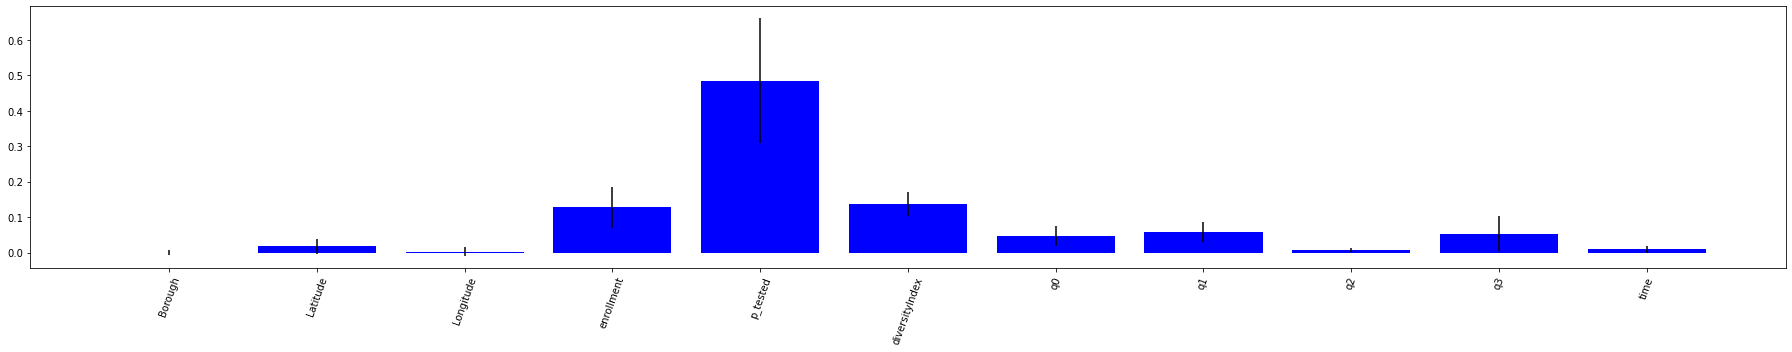

In [368]:
#Random Forest (Sample for Lowest Error without Ensemble)

from sklearn.inspection import permutation_importance

result = permutation_importance(model5, X_val, Y_val, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

The highest weighted features in this model seemed to be 'Percent Tested', 'Student Enrollment', and the 'diversityIndex' feature we constructed. Conversely, the least weight was given to 'Borough', general location data and 'Time' which we hypothesized to be pretty important factors.

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


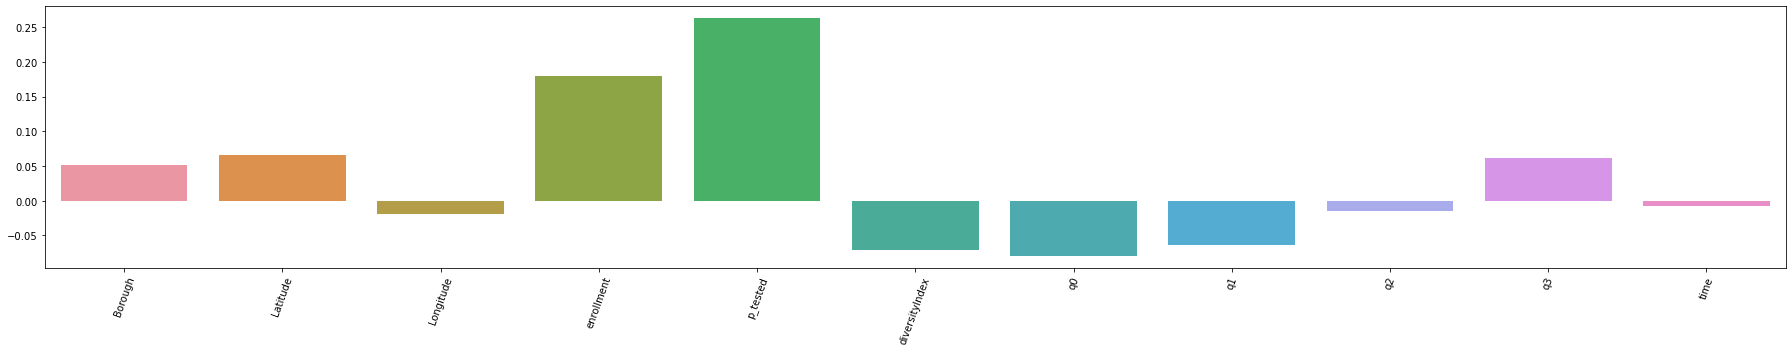

In [369]:
# Linear Regression (Sample For High Error)

importance = model4.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# Ridge Regression (Sample for Higher Error)
importance = model3.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

## Part 4: Evaluation with Lime

In order to explain predictions of our chosen model, we use LIME for model intepretability. In the following, we run LIME on a few individual predictions to illustrate the confidence of the model and how each feature is weighted. Details about these explanations are discussed in our paper.

In [370]:
# running LIME

import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_df.columns,
    class_names=['TotalScore'],
    mode='regression'
)

In [371]:
# creating a new test df to compare our model predictions with surrogate 
# LIME explainer model predictions

test = pd.concat([X_val, Y_val.to_frame()], axis=1)

In [ ]:
# examine the test df
test.head(10)

In [ ]:
# get some random samples
test.sample(15)

In [372]:
# data point 329

exp = explainer.explain_instance(
    data_row=X_val.loc[[329]].values[0], 
    predict_fn=model5.predict,
)

exp.show_in_notebook(show_table=True)

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [373]:
# data point 239

exp = explainer.explain_instance(
    data_row=X_val.loc[[239]].values[0], 
    predict_fn=model5.predict,
)

exp.show_in_notebook(show_table=True)

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
exp.show_in_notebook(show_table=True)

In [374]:
# data point 237

exp = explainer.explain_instance(
    data_row=X_val.loc[[237]].values[0], 
    predict_fn=model5.predict,
)

exp.show_in_notebook(show_table=True)

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [375]:
# data point 33

exp = explainer.explain_instance(
    data_row=X_val.loc[[33]].values[0], 
    predict_fn=model5.predict,
)

exp.show_in_notebook(show_table=True)

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [376]:
# data point 0

exp = explainer.explain_instance(
    data_row=X_val.loc[[0]].values[0], 
    predict_fn=model5.predict,
)

exp.show_in_notebook(show_table=True)

/Users/fionachiu/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
